In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# DeepTICA on chignolin-multithermal

## Load

Load COLVAR

In [2]:
from stateinterpreter import load_dataframe

n_walkers = 8
kBT = 2.827
data_path = '../../../data/md_datasets/chignolin-multi/'
colvar_file = [data_path+f'COLVAR.{i}' for i in range(n_walkers)]

start,stop,stride=50000,None,10
colvar = load_dataframe(colvar_file, start, stop, stride) #.drop(['idx', 'time'], axis=1)

# increase time per walker
offset = 300000
colvar['time'] = colvar['time']+offset*colvar['walker']
colvar

,time,rmsd_ca,rmsd_nmr,end,hbonds,ene,mc.ene,opes.bias,walker
0,50000.0,0.060760,0.134141,0.494580,3.665653,-74322.211426,-74322.211426,-10.352462,0
1,50010.0,0.051932,0.118525,0.486875,3.655476,-72291.523926,-72291.523926,-6.920915,0
2,50020.0,0.071429,0.152899,0.493348,3.474171,-70534.093750,-70534.093750,-118.902791,0
3,50030.0,0.046329,0.130884,0.522891,3.583474,-73659.394043,-73659.394043,6.956197,0
4,50040.0,0.094171,0.186114,0.482490,3.514000,-65286.707031,-65286.707031,-1028.386804,0
...,...,...,...,...,...,...,...,...,...
200003,2399958.0,0.093556,0.153824,0.496600,3.662016,-73542.294434,-73542.294434,8.476386,7
200004,2399968.0,0.111946,0.189108,0.503671,3.673007,-71430.572266,-71430.572266,-49.530657,7
200005,2399978.0,0.121061,0.202381,0.519384,3.445728,-73331.362305,-73331.362305,9.696516,7
200006,2399988.0,0.088178,0.155601,0.475260,3.482313,-74444.951660,-74444.951660,-14.891253,7


In [ ]:
from stateinterpreter import load_trajectory
from stateinterpreter.descriptors import compute_descriptors

n_walkers = 8
traj_dict = {
        'trajectory' : [data_path+f'traj_comp.{i}.xtc' for i in range(n_walkers)],
        'topology' : data_path+'chignolin-ca.pdb' if "multi" in data_path else data_path+'chignolin-ref.pdb'
    }

start,stop,stride=10000,350000,10
traj = load_trajectory(traj_dict,start,stop,stride)
descriptors, feats_info = compute_descriptors( traj, descriptors = ['hbonds_distances','hbonds_contacts','dihedrals'] )

# Select descriptors 
regex_filter = 'HB_DIST'
X = descriptors.filter(regex=regex_filter).values
n_input = X.shape[1]

print(X.shape)

Load COLVAR w/DeepTICA

In [2]:
from stateinterpreter import load_dataframe

kBT = 2.827
data_path = '../../../data/md_datasets/chignolin-biased/'
subfolder = 'deeptica-64-64-3-lag50/biased_rerun/'
colvar_file = data_path+subfolder+'COLVAR'

colvar = load_dataframe(colvar_file)
colvar

,Unnamed: 0,time,rmsd_ca,rmsd_nmr,end,hbonds,ene,mc.ene,static.bias,opes.bias,...,end2,deep.node-0,deep.node-1,deep.node-2,deep.node-3,deep.node-4,walker,DeepTICA 1,DeepTICA 2,DeepTICA 3
0,0,10000.0,0.631063,0.666167,2.311217,0.483060,-68413.210938,-68413.210938,-388.841978,-1.943586,...,2.311247,0.727059,0.470769,-0.096201,-0.143442,-0.717644,0,0.458449,-0.280840,0.141883
1,1,10010.0,0.613172,0.639578,2.257017,0.472176,-66576.468750,-66576.468750,-732.001468,-1.370006,...,2.257202,0.744171,0.353381,-0.149420,-0.225333,-0.695489,0,0.432667,-0.301468,0.190154
2,2,10020.0,0.646965,0.687485,2.307000,0.496646,-68158.257812,-68158.257812,-430.546331,0.277823,...,2.306721,0.764121,0.443908,-0.062244,-0.159398,-0.645242,0,0.465655,-0.280422,0.216451
3,3,10030.0,0.629119,0.658243,2.320360,0.462489,-67401.234375,-67401.234375,-565.699206,-1.090438,...,2.320181,0.568159,0.186556,0.014508,-0.303327,-0.688342,0,0.505376,-0.307580,0.168776
4,4,10040.0,0.490171,0.552280,1.829197,0.543864,-66810.593750,-66810.593750,-682.799209,1.222817,...,1.829077,0.567153,0.236880,0.106792,-0.106889,-0.602959,0,0.395822,-0.250981,0.221783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271995,271995,2799950.0,0.062790,0.150849,0.510614,3.667233,-79576.625000,-79576.625000,-744.620425,0.431598,...,0.511125,-0.072716,0.227159,-0.585348,-0.821062,0.955867,7,-0.850476,-0.811031,0.176536
271996,271996,2799960.0,0.054404,0.144080,0.522685,3.600143,-78857.242188,-78857.242188,-577.977066,0.628784,...,0.522763,0.078980,0.186605,-0.585246,-0.808569,0.955631,7,-0.800463,-0.812598,0.313899
271997,271997,2799970.0,0.057814,0.173770,0.501959,3.584953,-78970.945312,-78970.945312,-602.919242,-10.148644,...,0.501543,-0.066171,0.158048,-0.568044,-0.800454,0.994550,7,-0.824389,-0.804628,0.277378
271998,271998,2799980.0,0.037877,0.135232,0.489110,3.666538,-77319.312500,-77319.312500,-293.754128,4.442149,...,0.488962,0.017143,0.061962,-0.676203,-0.802594,0.932131,7,-0.833519,-0.849108,0.184099


Load TRAJ and compute descriptors

In [3]:
from stateinterpreter import load_trajectory
from stateinterpreter.descriptors import compute_descriptors

n_walkers = 8
traj_dict = {
        'trajectory' : [data_path+f'traj_comp.{i}.xtc' for i in range(n_walkers)],
        'topology' : data_path+'chignolin-ca.pdb' if "multi" in data_path else data_path+'chignolin-ref.pdb'
    }

start,stop,stride=10000,350000,10
traj = load_trajectory(traj_dict,start,stop,stride)
descriptors, feats_info = compute_descriptors( traj, descriptors = ['hbonds_distances','hbonds_contacts','dihedrals'] )

# Select descriptors 
regex_filter = 'HB_DIST'
X = descriptors.filter(regex=regex_filter).values
n_input = X.shape[1]

print(X.shape)

Computing Hydrogen bonds distances
Donors: [0, 15, 23, 36, 44, 70, 85, 91, 99, 106, 112, 120, 130, 144, 157]
Acceptors: [  0  15  22  23  36  43  44  52  53  55  56  69  70  81  82  84  85  91
  98  99 105 106 112 119 120 130 143 144 157 164 165]
Computing Hydrogen bonds contacts
Donors: [0, 15, 23, 36, 44, 70, 85, 91, 99, 106, 112, 120, 130, 144, 157]
Acceptors: [  0  15  22  23  36  43  44  52  53  55  56  69  70  81  82  84  85  91
  98  99 105 106 112 119 120 130 143 144 157 164 165]
Descriptors: (272000, 738)
(272000, 318)


Logweights

In [4]:
#------------- PARAMETERS -------------
multicanonical    = True
temp              = 340.
temp0             = 340.
#--------------------------------------

# Calculate inverse temperature
kb=0.008314
beta=1./(kb*temp)
beta0=1./(kb*temp0)

# Extract cvs from df

t = colvar['time'].values # save time
ene = colvar['ene'].values.astype(np.float64) # store energy as long double
bias = colvar.filter(regex='.bias').values.sum(axis=1) # Load *.bias columns and sum them

# Compute log-weights for time reweighting
logweight = beta*bias

if multicanonical:
    ene -= np.mean(ene) #first shift energy by its mean value
    logweight += (beta0-beta)*ene

## Compute

In [ ]:
from mlcvs.utils.data import create_time_lagged_dataset, FastTensorDataLoader
from torch.utils.data import random_split

#------------- PARAMETERS -------------
lag_time = 50
size_train  = 0.8 
#--------------------------------------

# create dataset
dataset = create_time_lagged_dataset(X.values,t=t,lag_time=lag_time,logweights=logweight)

# split train - valid 
n_train  = int( size_train * len(dataset) )
n_valid  = len(dataset) - n_train
train_data, valid_data = random_split(dataset,[n_train,n_valid]) 

# create dataloaders 
train_loader = FastTensorDataLoader(train_data, batch_size=len(train_data))
valid_loader = FastTensorDataLoader(valid_data, batch_size=len(valid_data))

print('Time-lagged pairs:\t',len(dataset))
print('Training data:\t\t',len(train_data))
print('Validation data:\t',len(valid_data))

Train CVs

In [ ]:
import torch
from mlcvs.tica import DeepTICA_CV

#------------- PARAMETERS -------------
nodes             = [n_input,64,64,3]
activ_type        = 'relu'
loss_type         = 'sum2'
n_eig             = nodes[-1]

lrate             = 1e-3
l2_reg            = 0.

num_epochs        = 1000
earlystop         = True
es_patience       = 5
es_consecutive    = False

log_every         = 10
#--------------------------------------

# DEVICE
device = torch.device("cpu") #"cuda" if torch.cuda.is_available() else "cpu")

# MODEL
model = DeepTICA_CV(nodes)
model.to(device)

# OPTIMIZER
opt = torch.optim.Adam(model.parameters(), lr=lrate, weight_decay=l2_reg)

# REGULARIZATION
model.set_optimizer(opt)
model.set_earlystopping(patience=es_patience,min_delta=0.,consecutive=es_consecutive, save_best_model=True, log=False)

# TRAIN
model.fit(train_loader,valid_loader,
            standardize_inputs=True,
            standardize_outputs=True,
            loss_type=loss_type,
            n_eig=n_eig,
            nepochs=num_epochs,
            info=False, log_every=log_every)

## Analyze

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(12,5),dpi=100)

loss_train = [x.cpu() for x in model.loss_train]
loss_valid = [x.cpu() for x in model.loss_valid]

# Loss function
ax = axs[0]
ax.plot(loss_train,'-',label='Train')
ax.plot(loss_valid,'--',label='Valid')
ax.set_ylabel('Loss Function')

# Eigenvalues vs epoch
ax = axs[1]
with torch.no_grad():
    evals_train = np.asarray(torch.cat(model.evals_train).cpu())
for i in range(n_eig):
    ax.plot(evals_train[:,i],label='Eig. '+str(i+1))
ax.set_ylabel('Eigenvalues')

# Common setup
for ax in axs:
    if model.earlystopping_.early_stop:
        ax.axvline(model.earlystopping_.best_epoch,ls='dotted',color='grey',alpha=0.5,label='Early Stopping')
        ax.set_xlabel('Epochs')
        ax.legend(ncol=2)

plt.tight_layout()
plt.show()

In [ ]:
# Hexbin plot in physical space    
fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

x = colvar['hbonds'].values
y = colvar['rmsd_ca'].values

# compute cvs
with torch.no_grad():
    s = model(torch.Tensor(X.values)).numpy()
    
for i,ax in enumerate(axs):
    pp = ax.hexbin(x,y,C=s[:,i],gridsize=150,cmap='fessa')
    cbar = plt.colorbar(pp,ax=ax)
    ax.set_title('Deep-TICA '+str(i+1))
    #ax.set_xlabel(r'$\phi$ [rad]')
    #ax.set_ylabel(r'$\psi$ [rad]')
    cbar.set_label('Deep-TICA '+str(i+1))

plt.tight_layout()
plt.show()

In [ ]:
from mlcvs.utils.fes import compute_fes

fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

for i in range(n_eig):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight)+1e-24,
                                        blocks=4,
                                        bandwidth=0.02,scale_by='range',
                                        plot=True, plot_max_fes=100, ax = axs[i])
    axs[i].set_xlabel('Deep-TICA '+str(i+1))

In [ ]:
# Add DeepTICA to COLVAR
with torch.no_grad():
    s = model(torch.Tensor(X)).numpy()

for i in range(n_eig):
    colvar[f'DeepTICA {i+1}'] = s[:,i]

colvar

In [ ]:
from pathlib import Path
save_folder = data_path+'deeptica-64-64-3-lag50/'
Path(save_folder).mkdir(parents=True, exist_ok=True)

colvar.to_csv(save_folder+'COLVAR')
model.export(save_folder)

## Evaluate CVs on new traj

In [30]:
from stateinterpreter import load_dataframe

n_walkers = 8
kBT = 2.827
data_path = '../../../data/md_datasets/chignolin-biased/'
colvar_file = [data_path+f'COLVAR.{i}' for i in range(n_walkers)]

start,stop,stride=10000,350000,10
colvar = load_dataframe(colvar_file, start, stop, stride) #.drop(['idx', 'time'], axis=1)

# increase time per walker
offset = 350000
colvar['time'] = colvar['time']+offset*colvar['walker']
colvar

,time,rmsd_ca,rmsd_nmr,end,hbonds,ene,mc.ene,static.bias,opes.bias,opes.rct,...,opes.neff,opes.nker,time2,end2,deep.node-0,deep.node-1,deep.node-2,deep.node-3,deep.node-4,walker
0,10000.0,0.631063,0.666167,2.311217,0.483060,-68413.210938,-68413.210938,-388.841978,-1.943586,-0.804202,...,1.255052e+04,277.0,10000.0,2.311247,0.727059,0.470769,-0.096201,-0.143442,-0.717644,0
1,10010.0,0.613172,0.639578,2.257017,0.472176,-66576.468750,-66576.468750,-732.001468,-1.370006,-0.804528,...,1.256948e+04,276.0,10010.0,2.257202,0.744171,0.353381,-0.149420,-0.225333,-0.695489,0
2,10020.0,0.646965,0.687485,2.307000,0.496646,-68158.257812,-68158.257812,-430.546331,0.277823,-0.805073,...,1.258718e+04,276.0,10020.0,2.306721,0.764121,0.443908,-0.062244,-0.159398,-0.645242,0
3,10030.0,0.629119,0.658243,2.320360,0.462489,-67401.234375,-67401.234375,-565.699206,-1.090438,-0.805491,...,1.260597e+04,275.0,10030.0,2.320181,0.568159,0.186556,0.014508,-0.303327,-0.688342,0
4,10040.0,0.490171,0.552280,1.829197,0.543864,-66810.593750,-66810.593750,-682.799209,1.222817,-0.805469,...,1.262752e+04,275.0,10040.0,1.829077,0.567153,0.236880,0.106792,-0.106889,-0.602959,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271995,2799950.0,0.062790,0.150849,0.510614,3.667233,-79576.625000,-79576.625000,-744.620425,0.431598,0.986423,...,1.005472e+06,678.0,349950.0,0.511125,-0.072716,0.227159,-0.585348,-0.821062,0.955867,7
271996,2799960.0,0.054404,0.144080,0.522685,3.600143,-78857.242188,-78857.242188,-577.977066,0.628784,0.986399,...,1.005495e+06,678.0,349960.0,0.522763,0.078980,0.186605,-0.585246,-0.808569,0.955631,7
271997,2799970.0,0.057814,0.173770,0.501959,3.584953,-78970.945312,-78970.945312,-602.919242,-10.148644,0.986392,...,1.005516e+06,678.0,349970.0,0.501543,-0.066171,0.158048,-0.568044,-0.800454,0.994550,7
271998,2799980.0,0.037877,0.135232,0.489110,3.666538,-77319.312500,-77319.312500,-293.754128,4.442149,0.986388,...,1.005539e+06,678.0,349980.0,0.488962,0.017143,0.061962,-0.676203,-0.802594,0.932131,7


In [39]:
from stateinterpreter import load_trajectory
from stateinterpreter.descriptors import compute_descriptors

traj_dict = {
        'trajectory' : [data_path+f'traj_comp.{i}.xtc' for i in range(n_walkers)],
        'topology' : data_path+'chignolin-ref.pdb'
    }

traj = load_trajectory(traj_dict,start,stop,stride)
descriptors, feats_info = compute_descriptors( traj, descriptors = ['hbonds_distances','hbonds_contacts','dihedrals'] )

# Select descriptors 
X2 = descriptors.filter(regex='HB_DIST').values
n_input = X2.shape[1]

print(X2.shape)

Computing Hydrogen bonds distances
Donors: [0, 15, 23, 36, 44, 70, 85, 91, 99, 106, 112, 120, 130, 144, 157]
Acceptors: [  0  15  22  23  36  43  44  52  53  55  56  69  70  81  82  84  85  91
  98  99 105 106 112 119 120 130 143 144 157 164 165]
Computing Hydrogen bonds contacts
Donors: [0, 15, 23, 36, 44, 70, 85, 91, 99, 106, 112, 120, 130, 144, 157]
Acceptors: [  0  15  22  23  36  43  44  52  53  55  56  69  70  81  82  84  85  91
  98  99 105 106 112 119 120 130 143 144 157 164 165]
Descriptors: (272000, 738)
(272000, 318)


In [32]:
#------------- PARAMETERS -------------
multicanonical    = True
temp              = 340.
temp0             = 340.
#--------------------------------------

# Calculate inverse temperature
kb=0.008314
beta=1./(kb*temp)
beta0=1./(kb*temp0)

# Extract cvs from df

t = colvar['time'].values # save time
ene = colvar['ene'].values.astype(np.float64) # store energy as long double
bias = colvar.filter(regex='.bias').values.sum(axis=1) # Load *.bias columns and sum them

# Compute log-weights for time reweighting
logweight = beta*bias

if multicanonical:
    ene -= np.mean(ene) #first shift energy by its mean value
    logweight += (beta0-beta)*ene

Load model

In [48]:
import torch
from mlcvs.tica import DeepTICA_CV

#------------- PARAMETERS -------------
nodes             = [n_input,64,64,3]
activ_type        = 'relu'
loss_type         = 'sum2'
n_eig             = nodes[-1]

lrate             = 1e-3
l2_reg            = 0.

num_epochs        = 1000
earlystop         = True
es_patience       = 5
es_consecutive    = False

log_every         = 10
#--------------------------------------

# DEVICE
device = torch.device("cpu") #"cuda" if torch.cuda.is_available() else "cpu")

# MODEL
model = DeepTICA_CV(nodes)
model.to(device)

# OPTIMIZER
opt = torch.optim.Adam(model.parameters(), lr=lrate, weight_decay=l2_reg)

# REGULARIZATION
model.set_optimizer(opt)
model.set_earlystopping(patience=es_patience,min_delta=0.,consecutive=es_consecutive, save_best_model=True, log=False)

model_folder = '/home/lbonati@iit.local/work/data/md_datasets/chignolin-multi/deeptica-64-64-3-lag50/'
model.load_checkpoint(model_folder+'model_checkpoint.pt')
model.standardize_inputs(torch.Tensor(X))
model.standardize_outputs(torch.Tensor(X))

In [49]:
# Add DeepTICA to COLVAR
with torch.no_grad():
    s = model(torch.Tensor(X2)).numpy()

for i in range(n_eig):
    colvar[f'DeepTICA {i+1}'] = s[:,i]

colvar

,time,rmsd_ca,rmsd_nmr,end,hbonds,ene,mc.ene,static.bias,opes.bias,opes.rct,...,end2,deep.node-0,deep.node-1,deep.node-2,deep.node-3,deep.node-4,walker,DeepTICA 1,DeepTICA 2,DeepTICA 3
0,10000.0,0.631063,0.666167,2.311217,0.483060,-68413.210938,-68413.210938,-388.841978,-1.943586,-0.804202,...,2.311247,0.727059,0.470769,-0.096201,-0.143442,-0.717644,0,0.458449,-0.280840,0.141883
1,10010.0,0.613172,0.639578,2.257017,0.472176,-66576.468750,-66576.468750,-732.001468,-1.370006,-0.804528,...,2.257202,0.744171,0.353381,-0.149420,-0.225333,-0.695489,0,0.432667,-0.301468,0.190154
2,10020.0,0.646965,0.687485,2.307000,0.496646,-68158.257812,-68158.257812,-430.546331,0.277823,-0.805073,...,2.306721,0.764121,0.443908,-0.062244,-0.159398,-0.645242,0,0.465655,-0.280422,0.216451
3,10030.0,0.629119,0.658243,2.320360,0.462489,-67401.234375,-67401.234375,-565.699206,-1.090438,-0.805491,...,2.320181,0.568159,0.186556,0.014508,-0.303327,-0.688342,0,0.505376,-0.307580,0.168776
4,10040.0,0.490171,0.552280,1.829197,0.543864,-66810.593750,-66810.593750,-682.799209,1.222817,-0.805469,...,1.829077,0.567153,0.236880,0.106792,-0.106889,-0.602959,0,0.395822,-0.250981,0.221783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271995,2799950.0,0.062790,0.150849,0.510614,3.667233,-79576.625000,-79576.625000,-744.620425,0.431598,0.986423,...,0.511125,-0.072716,0.227159,-0.585348,-0.821062,0.955867,7,-0.850476,-0.811031,0.176536
271996,2799960.0,0.054404,0.144080,0.522685,3.600143,-78857.242188,-78857.242188,-577.977066,0.628784,0.986399,...,0.522763,0.078980,0.186605,-0.585246,-0.808569,0.955631,7,-0.800463,-0.812598,0.313899
271997,2799970.0,0.057814,0.173770,0.501959,3.584953,-78970.945312,-78970.945312,-602.919242,-10.148644,0.986392,...,0.501543,-0.066171,0.158048,-0.568044,-0.800454,0.994550,7,-0.824389,-0.804628,0.277378
271998,2799980.0,0.037877,0.135232,0.489110,3.666538,-77319.312500,-77319.312500,-293.754128,4.442149,0.986388,...,0.488962,0.017143,0.061962,-0.676203,-0.802594,0.932131,7,-0.833519,-0.849108,0.184099


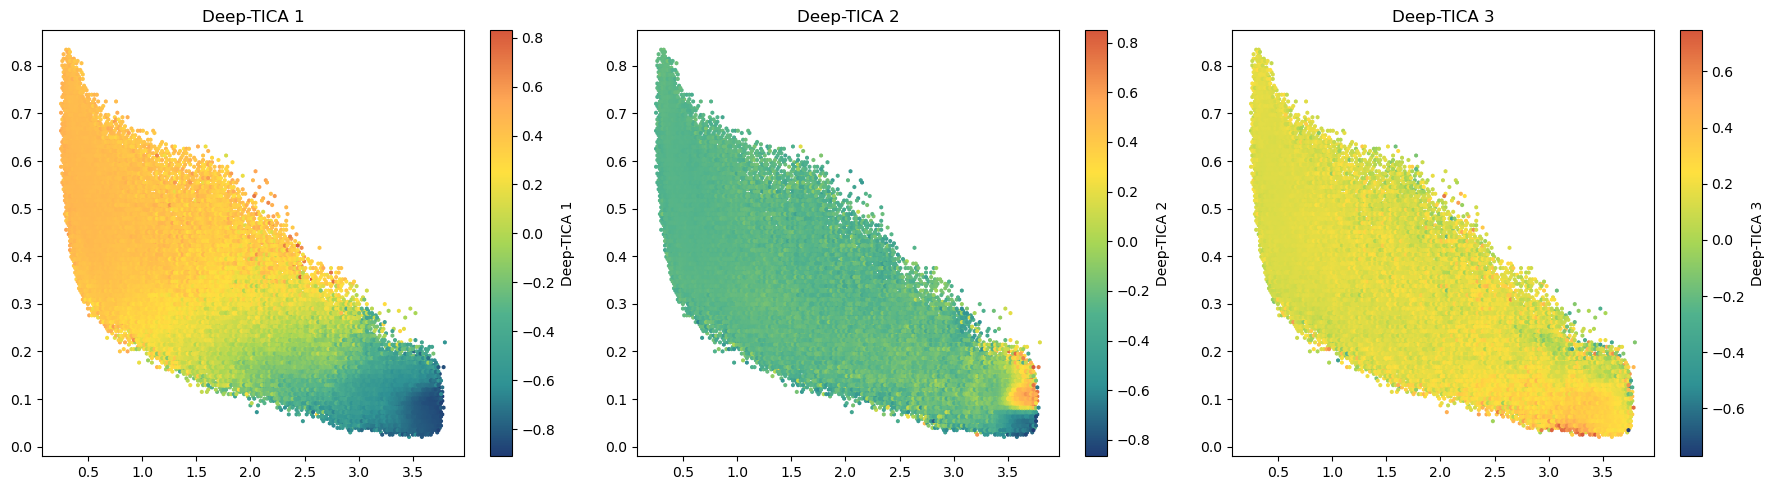

In [50]:
# Hexbin plot in physical space    
fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

x = colvar['hbonds'].values
y = colvar['rmsd_ca'].values

# compute cvs
with torch.no_grad():
    s = model(torch.Tensor(X2)).numpy()
    
for i,ax in enumerate(axs):
    pp = ax.hexbin(x,y,C=s[:,i],gridsize=150,cmap='fessa')
    cbar = plt.colorbar(pp,ax=ax)
    ax.set_title('Deep-TICA '+str(i+1))
    #ax.set_xlabel(r'$\phi$ [rad]')
    #ax.set_ylabel(r'$\psi$ [rad]')
    cbar.set_label('Deep-TICA '+str(i+1))

plt.tight_layout()
plt.show()

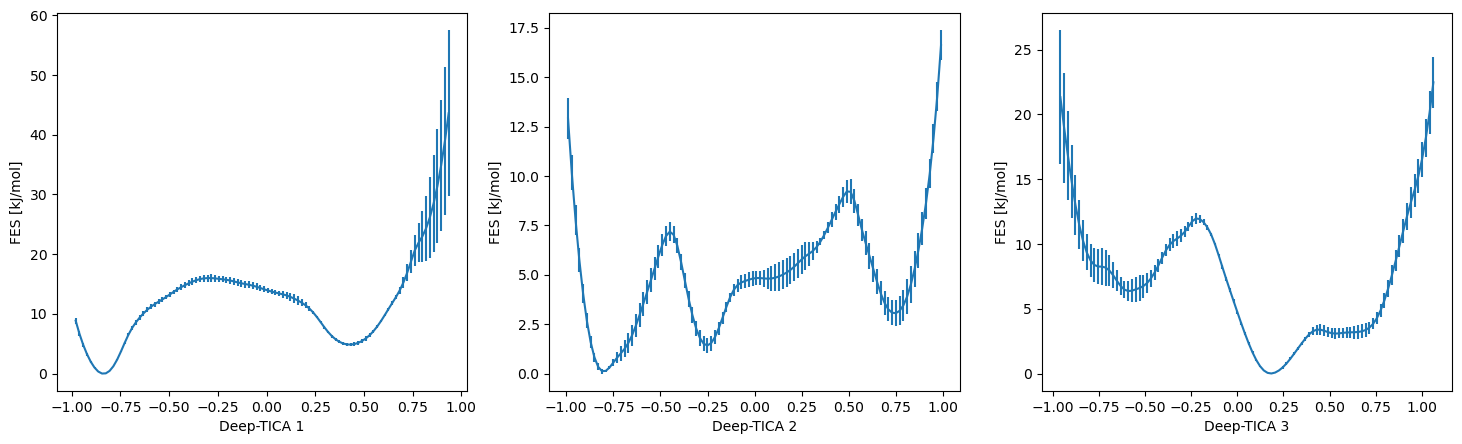

In [51]:
from mlcvs.utils.fes import compute_fes

fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

for i in range(n_eig):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight)+1e-24,
                                        blocks=4,
                                        bandwidth=0.02,scale_by='range',
                                        plot=True, plot_max_fes=100, ax = axs[i])
    axs[i].set_xlabel('Deep-TICA '+str(i+1))

In [52]:
from pathlib import Path
save_folder = data_path+'deeptica-64-64-3-lag50/biased_rerun/'
Path(save_folder).mkdir(parents=True, exist_ok=True)

colvar.to_csv(save_folder+'COLVAR')

# Stateinterpreter

Functions

In [5]:
from stateinterpreter.utils.numerical_utils import gaussian_kde

def plot_fes(cv,bandwidth,states_labels=None,logweights=None,kBT=2.5,cv_list=None,states_subset=None,num_samples=100,ax=None,prefix_label=""):
    
    if cv_list is not None:
        cv = cv[cv_list]

    empirical_centers = cv.to_numpy()
    KDE = gaussian_kde(empirical_centers,bandwidth,logweights)

    bounds = [(x.min(), x.max()) for x in KDE.dataset.T]
    mesh = np.meshgrid(*[np.linspace(b[0], b[1], num_samples) for b in bounds])

    positions = np.vstack([g.ravel() for g in mesh]).T
    fes = -kBT*KDE.logpdf(positions)
    fes -= fes.min()
    if ax is None:
        fig,ax = plt.subplots()
    ax.plot(mesh[0],fes/kBT,color='dimgrey',linewidth=2)
    ax.set_xlabel(cv.columns.values[0])
    ax.set_ylabel('FES [$k_B$T]')
    ax.set_xlim(bounds[0][0],bounds[0][1])
    ax.set_ylim(0,)
    
    if states_labels is not None:
        if states_subset is not None:
            labels = states_subset
        else:
            labels = sorted(states_labels['labels'].unique())
        for i in labels:
            mask = ( states_labels['labels'] == i ) & (states_labels['selection'] == True )
            Min = cv[mask].min().values[0] 
            Max = cv[mask].max().values[0] 
            ax.axvspan(Min,Max, alpha=0.5, color=f'fessa{6-i}')
            ax.text((Max+Min)/2,1,prefix_label+str(i),fontsize=14,ha='center')

def get_best_reg(classifier):
    num = []
    for reg in classifier._reg:
        # get number of features
        selected = classifier._get_selected(reg, feature_mode=False)
        unique_idxs = set()
        for state in selected.values():
            for data in state:
                unique_idxs.add(data[0])
        num.append(len(unique_idxs)) 

    # accuracy
    acc = classifier._crossval

    # criterion
    score = (1-acc)*100+num

    # return reg which minimizes it
    best_reg = np.argmin(score)
    return classifier._reg[best_reg],acc[best_reg],num[best_reg]

In [14]:
def train(cv_list,mask=None,base_state="",merge_states=None,states_subset=None):
    if mask is not None:
        # apply mask
        cv = colvar[mask].reset_index()
        desc = descriptors[mask].reset_index()
        logw = None
        if logweights is not None:
            logw = logweights[mask]
            if type(logw) == pd.DataFrame:
                logw = logw.reset_index()
    else:
        cv = colvar
        desc = descriptors
        logw = logweights

    # filter HB-descriptors
    # Select only contacts which are greater than 0.5 at least once for these states
    if filter_descriptors:
        selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
        desc = desc[selected.index[selected]]
        print('Filtering H-bonds:',desc.shape)

    # identify states
    states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, logweights=logw, fes_cutoff=kBT, gradient_descent_iterates=gradient_descent_iterates)
    # merge states if requested 
    if merge_states is not None:
        for pair in merge_states:
            states_labels.loc[states_labels['labels'] == pair[1], 'labels'] = pair[0]
    
    # count states
    if states_subset is None:
        num_states = len(states_labels['labels'].unique())
    else:
        num_states = len(states_subset)
    num_histo = num_states if num_states>2 else 1
    
    # plot setup
    if num_states == 1:
        fig,ax = plt.subplots(figsize=(4.5,3))
    else:
        #fig,axs = plt.subplots(1,2,figsize=(7.5,5))
        fig = plt.figure(figsize=(13.5,3), constrained_layout=True)
        gs = matplotlib.gridspec.GridSpec(num_histo, 3, figure=fig)
        ax1 = fig.add_subplot(gs[:, 0])
        ax2 = fig.add_subplot(gs[:, 1])
        axs_histo = []
        for i in range(num_histo):
            axs_histo.append(fig.add_subplot(gs[i, 2]))
        ax = ax1
        
    plot_fes(cv[cv_list],bandwidth,states_labels,logweights=logw,num_samples=200,states_subset=states_subset,prefix_label=base_state+'.' if len(base_state)>0 else "",ax=ax)
    
    if len(base_state) > 0 :
        ax.set_title( f'State {base_state}' )

    if num_states > 1 :

        # classify
        if states_subset is not None:
            state_names = [f'{base_state}.{i}' for i in states_subset ]
        else:
            state_names = [f'{base_state}.{i}' for i in sorted(states_labels['labels'].unique()) ]
        sample_obj, features_names, classes_names = prepare_training_dataset(desc, states_labels, num_samples, regex_filter=select_feat, states_names=state_names,states_subset=states_subset) 
        classifier = Classifier(sample_obj, features_names, classes_names)
        classifier.compute(regularizers, max_iter= 10000) #, groups=groups)

        # get best reg
        reg,acc,num = get_best_reg(classifier)

        # plot
        ax = ax2
        _, ax_twin = plot_classifier_complexity_vs_accuracy(classifier, ax = ax)
        ax.axvline(np.log10(reg),linestyle='dotted',color='k')
        ax.text(np.log10(reg)+0.02,acc+.05,f'{np.round(acc*100,1)}%',fontsize=12,color='fessa0')
        ax_twin.text(np.log10(reg)+0.02,num+0.5,f'{num}',fontsize=12,color='fessa1')

        #print features
        print('Regularization --> log_10 (lambda) = ',np.round(np.log10(reg),3))
        classifier.print_selected(reg)

        relevant_feat = classifier.feature_summary(reg)
        plot_histogram_features(desc, states_labels, classes_names, relevant_feat, axs = axs_histo, height=1)

        #plt.tight_layout()
    if save_folder is not None:
        plt.savefig(save_folder+f'deeptica{cv_list[0][-1]}_state{base_state}_{feat_type}.png', bbox_inches='tight')


Parameters

In [7]:
import matplotlib
from stateinterpreter import identify_metastable_states,prepare_training_dataset,Classifier
from stateinterpreter.utils.plot import plot_classifier_complexity_vs_accuracy,plot_histogram_features

regularizers = np.geomspace(0.01, 1, 51)

logweights=logweight
num_samples = 5000
bandwidth = 0.05
data_path = '../../../data/md_datasets/chignolin-biased/'
save_folder = data_path+'deeptica-64-64-3-lag50/biased_rerun/'
gradient_descent_iterates = 0

In [36]:
# HBONDS
feat_type = 'hbonds'
select_feat = 'HB_CONT'
filter_descriptors = True

In [44]:
# ANGLES
feat_type = 'angles'
select_feat = 'sin_|cos_'
filter_descriptors = False 

In [40]:
# BOTH
feat_type =  'both' 
select_feat =  'sin_|cos_|HB_CONT'
filter_descriptors = False

## TICA 1

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 2 local minima with selected populations:
	Basin 0 -> 56498 configurations.
	Basin 1 -> 112867 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:04<00:00, 10.98it/s]


Regularization --> log_10 (lambda) =  -0.32
Accuracy: 99%
State .1:
 HB_CONTACT ASP3-N -- THR8-O


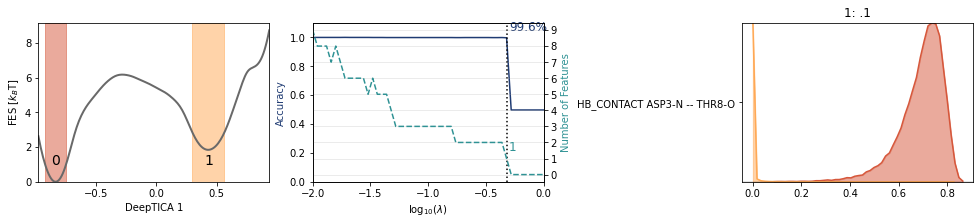

In [27]:
base_state = ""
cv_list = ['DeepTICA 1']
mask = None
train(cv_list,mask,base_state)

## TICA 2

### State 0

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 3 local minima with selected populations:
	Basin 0 -> 29783 configurations.
	Basin 1 -> 18456 configurations.
	Basin 2 -> 16195 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:17<00:00,  2.85it/s]


Regularization --> log_10 (lambda) =  -0.56
Accuracy: 86%
State 0.0:
 HB_CONTACT THR6-OG1s -- THR8-OG1s
State 0.1:
State 0.2:
 SIDECHAIN cos_chi1 THR8


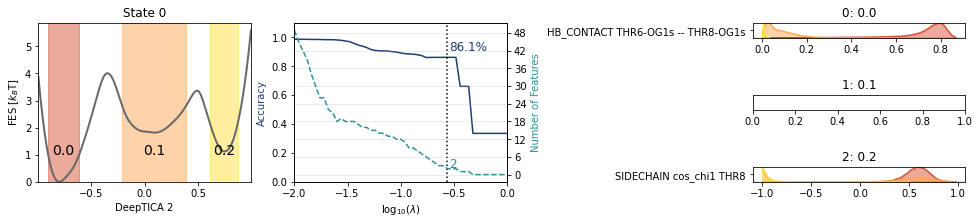

In [28]:
base_state= "0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.55
train(cv_list,mask,base_state)

### State 0 (0.0 vs 0.1)

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 3 local minima with selected populations:
	Basin 0 -> 29783 configurations.
	Basin 1 -> 18456 configurations.
	Basin 2 -> 16195 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:04<00:00, 12.42it/s]


Regularization --> log_10 (lambda) =  -0.88
Accuracy: 97%
State a-0.1:
 HB_CONTACT THR6-OG1s -- THR8-OG1s


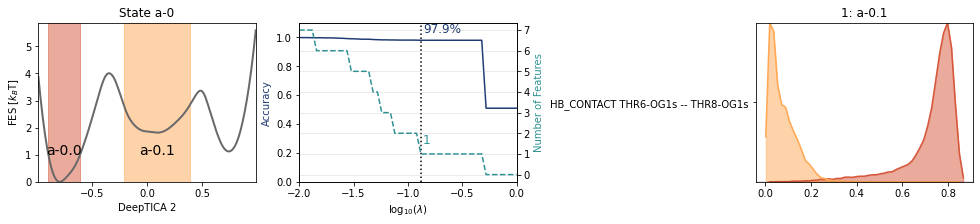

In [29]:
base_state= "a-0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.55
train(cv_list,mask,base_state,states_subset=[0,1])

### State 0 (0.0 vs 0.2)

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 3 local minima with selected populations:
	Basin 0 -> 29783 configurations.
	Basin 1 -> 18456 configurations.
	Basin 2 -> 16195 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:04<00:00, 10.98it/s]


Regularization --> log_10 (lambda) =  -0.32
Accuracy: 99%
State b-0.2:
 SIDECHAIN sin_chi1 THR6


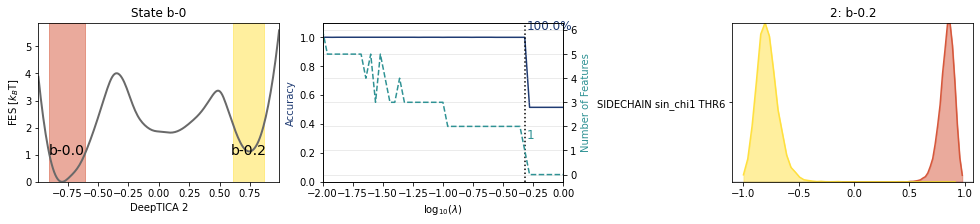

In [30]:
base_state= "b-0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.55
train(cv_list,mask,base_state,states_subset=[0,2])

### State 1

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 1 local minima with selected populations:
	Basin 0 -> 139958 configurations.


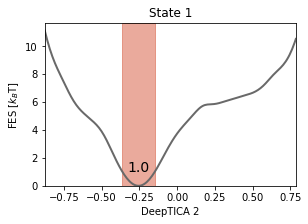

In [31]:
base_state = "1"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] > -0.55
train(cv_list,mask,base_state)

## TICA 3

### State 0.0

DEV >>> Finding Local Minima
DEV >>> Basin Assignment


/home/lbonati@iit.local/work/md-stateinterpreter/stateinterpreter/ml.py:71: UserWarning: The asked number of samples is higher than the possible unique values. Sampling with replacement
  warnings.warn("The asked number of samples is higher than the possible unique values. Sampling with replacement")


Found 3 local minima with selected populations:
	Basin 0 -> 1329 configurations.
	Basin 1 -> 20933 configurations.
	Basin 2 -> 13689 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 72.96it/s]


Regularization --> log_10 (lambda) =  -0.48
Accuracy: 99%
State 0.0.1:
 SIDECHAIN sin_chi1 TYR1


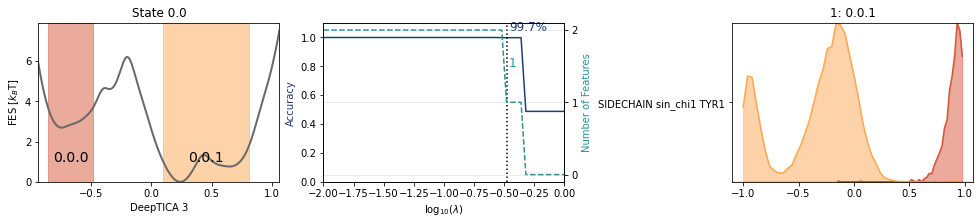

In [45]:
base_state = "0.0"
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 ) & ( colvar['DeepTICA 2'] < -0.35)

#old_bandwidth=bandwidth
#bandwidth=0.1
train(cv_list,mask,base_state,merge_states=[[1,2]])
#bandwidth = old_bandwidth

### State 0.1

DEV >>> Finding Local Minima
DEV >>> Basin Assignment


/home/lbonati@iit.local/work/md-stateinterpreter/stateinterpreter/ml.py:71: UserWarning: The asked number of samples is higher than the possible unique values. Sampling with replacement
  warnings.warn("The asked number of samples is higher than the possible unique values. Sampling with replacement")


Found 5 local minima with selected populations:
	Basin 0 -> 625 configurations.
	Basin 1 -> 1433 configurations.
	Basin 2 -> 7608 configurations.
	Basin 3 -> 5445 configurations.
	Basin 4 -> 4691 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 72.32it/s]


Regularization --> log_10 (lambda) =  -0.6
Accuracy: 99%
State 0.1.2:
 SIDECHAIN sin_chi1 TYR1


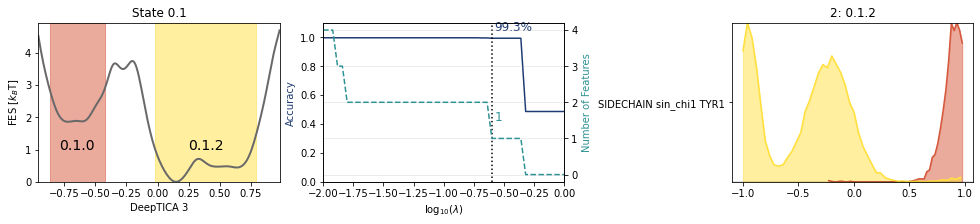

In [46]:
base_state = "0.1"
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 ) & (colvar['DeepTICA 2'] > -0.35) & ( colvar['DeepTICA 2'] < 0.5) 
train(cv_list,mask,base_state,merge_states=[[0,1],[2,3],[2,4]],states_subset=[0,2])

### State 0.2

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 3 local minima with selected populations:
	Basin 0 -> 3068 configurations.
	Basin 1 -> 4916 configurations.
	Basin 2 -> 8772 configurations.


/home/lbonati@iit.local/work/md-stateinterpreter/stateinterpreter/ml.py:71: UserWarning: The asked number of samples is higher than the possible unique values. Sampling with replacement
  warnings.warn("The asked number of samples is higher than the possible unique values. Sampling with replacement")
Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 72.20it/s]


Regularization --> log_10 (lambda) =  -0.64
Accuracy: 99%
State 0.2.1:
 SIDECHAIN sin_chi1 TYR1


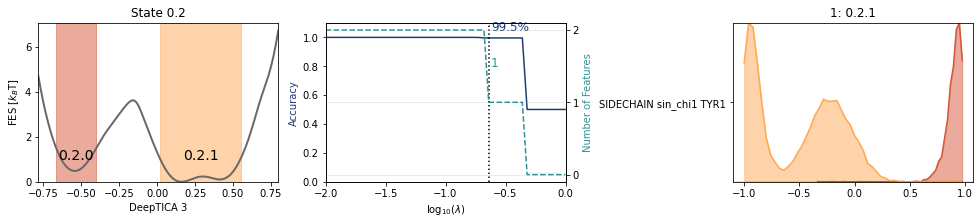

In [47]:
base_state = "0.2"
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 ) & ( colvar['DeepTICA 2'] > 0.5 )
train(cv_list,mask,base_state,merge_states=[[1,2]],states_subset=[0,1])

### State 1.0

In [ ]:
base_state = "1.0"

# filter colv
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] > -0.55 )
cv = colvar[mask].reset_index()
desc = descriptors[mask].reset_index()

# filter HB-descriptors
# Select only contacts which are greater than 0.5 at least once for these states
if filter_descriptors:
    selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
    desc = desc[selected.index[selected]]
    print('Filtering H-bonds:',desc.shape)
    
# bandwitdth
#bandwidth = 0.05

# identify states
#states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, fes_cutoff=kBT)
plot_fes(cv[cv_list],bandwidth,states_labels=None,num_samples=200,prefix_label=base_state+'.')

##  TICA 23 (state 0)

In [ ]:
base_state = "0"

# filter colv
cv_list = ['DeepTICA 2','DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 )
cv = colvar[mask].reset_index()
desc = descriptors[mask].reset_index()

# filter HB-descriptors
# Select only contacts which are greater than 0.5 at least once for these states
if filter_descriptors:
    selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
    desc = desc[selected.index[selected]]
    print('Filtering H-bonds:',desc.shape)
    
# bandwitdth
# bandwidth = 0.1

# identify states
states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, fes_cutoff=kBT)

In [ ]:
from stateinterpreter.utils.plot import plot_states

plot_states(cv, states_labels, cv_list, fes_isolines=True, bandwidth=bandwidth, cmap_name='fessa')

## TICA 3 (state 0)

In [ ]:
base_state = "0.-"

# filter colv
cv_list = ['DeepTICA 3']
mask = colvar['DeepTICA 1'] < -0.55
cv = colvar[mask].reset_index()
desc = descriptors[mask].reset_index()

# filter HB-descriptors
# Select only contacts which are greater than 0.5 at least once for these states
if filter_descriptors:
    selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
    desc = desc[selected.index[selected]]
    print('Filtering H-bonds:',desc.shape)

# bandwitdth
#bandwidth = 0.05

# identify states
states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, fes_cutoff=kBT)
plot_fes(cv[cv_list],bandwidth,states_labels,num_samples=200,prefix_label=base_state+'.')

In [ ]:
from stateinterpreter import prepare_training_dataset,Classifier

regularizers = np.geomspace(0.01, 1, 51)
select_feat = 'HB_CONT'
state_names = [f'{base_state}.{i}' for i in range(len(states_labels['labels'].unique())) ]
sample_obj, features_names, classes_names = prepare_training_dataset(desc, states_labels, 10000, regex_filter=select_feat, states_names=state_names) 
                                                    #states_subset=states_subset, )
classifier = Classifier(sample_obj, features_names, classes_names)
classifier.compute(regularizers, max_iter= 10000) #, groups=groups)

classifier.plot();

In [ ]:
from stateinterpreter.utils.plot import plot_histogram_features
import matplotlib.pyplot as plt 

reg = 10**(-0.5)
classifier.print_selected(reg)

relevant_feat = classifier.feature_summary(reg)
plot_histogram_features(desc, states_labels, classes_names, relevant_feat, height=1.5)